
# Project: imdb movies - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
this data set contains information about 10000 movies collected from The Movie Database (TMDb), including user rating, revenue, budget and genres

### Question for Analysis
#### What are the most popular genres in terms of revenue?
####  What kinds of properties are associated with movies that have high revenues?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#print null values and there places
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### data exploration conclusion and data cleaning to do list
<ul>
    <li>droping unwanted or irrelevant columns</li>
    <li>droping none values</li>
    <li>fixing some data types (dates)</li>
    <li>removes zeros from revenue and budget</li>
</ul>


### Data Cleaning

In [8]:
#this is just to make the data close and to not scroll up
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### removing none rows

In [9]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

In [10]:
df.shape

(1992, 21)

### droping Columns i wouldn't use `['keywords','tagline','homepage','imdb_id','id']`

In [11]:
df.drop(columns=['keywords','tagline','homepage','imdb_id','id'] ,inplace=True)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
df.shape

(1992, 16)

### checking and fixing data type

In [13]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
# changing release date from str to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 16 columns):
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
director                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null float64
revenue_adj             1992 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 264.6+ KB


### checking accuracy of some of the data

In [15]:
# first check 
df.query("release_date > 2021")[['release_year','release_date','original_title']].iloc[:3]

,release_year,release_date,original_title
9849,1962,2062-10-04,Dr. No
9881,1964,2064-09-17,Goldfinger
9884,1964,2064-07-06,A Hard Day's Night


### release date is obviously wrong  
so I have two choices here whether i removes these rows or replace them with the release year <br>
I've chosen to replace them as there is no release year over the year of 2021<br>
it's wrong because format like 95 should be translated to 1995 but it was instead changed to 2095

In [16]:
#second check
df.query("release_date > 2021")[['release_year','release_date','original_title']].iloc[:3]

,release_year,release_date,original_title
9849,1962,2062-10-04,Dr. No
9881,1964,2064-09-17,Goldfinger
9884,1964,2064-07-06,A Hard Day's Night


In [17]:
#creating the new correct column
date_df = df['release_year'].astype(str)+'-'+df['release_date'].dt.month.astype(str)+'-'+df['release_date'].dt.day.astype(str)
date_df = pd.to_datetime(date_df)
date_df = pd.DataFrame(date_df,columns={"release_date"})
date_df.iloc[:3]

,release_date
0,2015-06-09
1,2015-05-13
2,2015-03-18


In [18]:
#applying the change to data frame
df['release_date'] = date_df['release_date']
df[['release_date','release_year']].iloc[:3]

,release_date,release_year
0,2015-06-09,2015
1,2015-05-13,2015
2,2015-03-18,2015


In [19]:
#cheaking for false year
df.query("release_date > 2021")[['release_year','release_date','original_title']].iloc[:3]

,release_year,release_date,original_title


### separating important data into easier format to analyse

In [20]:
#checking for columns that should be separated
df[['director','genres','production_companies']].iloc[:3]

,director,genres,production_companies
0,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...


In [21]:
df[df['director'].str.contains('|', regex=False)]['director'][:3]

8           Kyle Balda|Pierre Coffin
11    Lana Wachowski|Lilly Wachowski
64          Glenn Ficarra|John Requa
Name: director, dtype: object

In [22]:
def df_explode(df_t ,column,split_c):
    """
    transform column value seprated by symbol into different rows
    parameters:
    df_t(DataFrame): data frame that contais the column
    column(str):name of the column
    split_c(str):the symbol which seprates the data
    
    return:
    DataFrame: new exploded data frame
    """
    df_t=df_t.copy()
    df_t[column] = df_t[column].apply(lambda x : x.split(split_c))
    return df_t.explode(column).reset_index(drop=True)

In [23]:
df = df_explode(df,'genres',"|")
df = df_explode(df,'production_companies',"|")
df = df_explode(df,'director',"|")
df = df_explode(df,'cast','|')
df.head(3)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### removing zero values

In [24]:
df = df.query('revenue != 0')
df = df.query('budget != 0')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59280 entries, 0 to 81063
Data columns (total 16 columns):
popularity              59280 non-null float64
budget                  59280 non-null int64
revenue                 59280 non-null int64
original_title          59280 non-null object
cast                    59280 non-null object
director                59280 non-null object
overview                59280 non-null object
runtime                 59280 non-null int64
genres                  59280 non-null object
production_companies    59280 non-null object
release_date            59280 non-null datetime64[ns]
vote_count              59280 non-null int64
vote_average            59280 non-null float64
release_year            59280 non-null int64
budget_adj              59280 non-null float64
revenue_adj             59280 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 7.7+ MB


In [26]:
df.shape

(59280, 16)

<a id='eda'></a>
## Exploratory Data Analysis

In [27]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,59280.000000,5.928000e+04,5.928000e+04,59280.000000,59280.000000,59280.000000,59280.000000,5.928000e+04,5.928000e+04
mean,2.010049,6.110002e+07,2.015511e+08,110.322605,1094.573448,6.268011,2007.615958,6.331876e+07,2.191137e+08
std,2.474087,5.711294e+07,2.727331e+08,19.078726,1315.949708,0.787483,7.256001,5.685275e+07,3.014819e+08
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,0.778589,1.900000e+07,3.255612e+07,96.000000,232.000000,5.700000,2006.000000,2.000000e+07,3.408478e+07
50%,1.302011,4.000000e+07,1.013520e+08,107.000000,564.000000,6.300000,2009.000000,4.573802e+07,1.066669e+08
75%,2.463982,8.500000e+07,2.664650e+08,121.000000,1527.000000,6.800000,2012.000000,9.147604e+07,2.948042e+08
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


### What are the most popular genres in terms of revenue?


In [28]:
#grouping the data with genres and unique title for each genres
df_genres = df.groupby(['genres','original_title']).mean()[['revenue_adj']]
#sum of all the revenue adjusted for each genre
df_genres = df_genres.groupby(level=0).sum().sort_values(by='revenue_adj',ascending=False)
df_genres

,revenue_adj
genres,
Adventure,1.289312e+11
Action,1.217314e+11
Thriller,7.098812e+10
Science Fiction,6.572727e+10
Comedy,6.544380e+10
Drama,6.235144e+10
Fantasy,6.209825e+10
Family,5.787264e+10
Animation,3.938591e+10


In [29]:
#filter any genre that is lower than 1.7% of the total revenue and grouping them together
filter = df_genres.sum()*0.017
others = df_genres.query('revenue_adj <= {}'.format(filter[0])).copy()
others.sum()

revenue_adj    1.674944e+10
dtype: float64

In [30]:
#removing values that's less than 1.7%
df_genres = df_genres.query('revenue_adj > {}'.format(filter[0]))
df_genres

,revenue_adj
genres,
Adventure,1.289312e+11
Action,1.217314e+11
Thriller,7.098812e+10
Science Fiction,6.572727e+10
Comedy,6.544380e+10
Drama,6.235144e+10
Fantasy,6.209825e+10
Family,5.787264e+10
Animation,3.938591e+10


In [31]:
#creating the others row
other = others.sum()
other.name = 'Others'
other

revenue_adj    1.674944e+10
Name: Others, dtype: float64

In [32]:
#appending the other row to the genres df
df_genres = df_genres.append(other)

Text(0,0.5,'revenue')

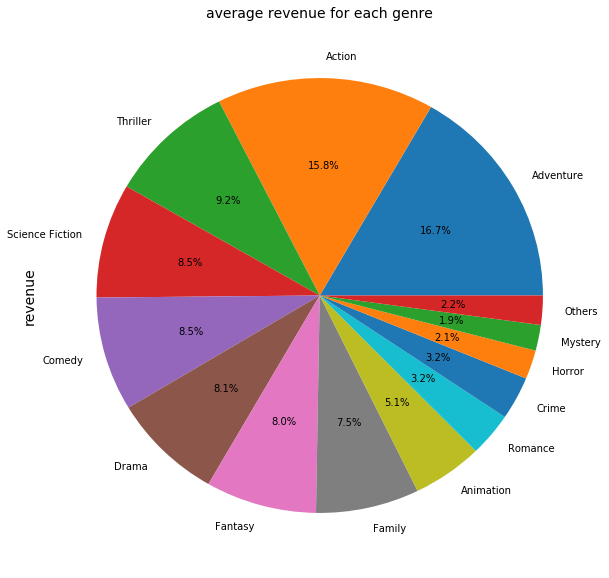

In [36]:
#ploting a pie chart showing percentage of each genre
df_genres.plot.pie(figsize=(10,10),autopct='%1.1f%%', subplots=True, legend=False)
plt.title("average revenue for each genre",fontsize= 14)
plt.ylabel("revenue",fontsize=14)

### What kinds of properties are associated with movies that have high revenues?

#### let's start with the budget

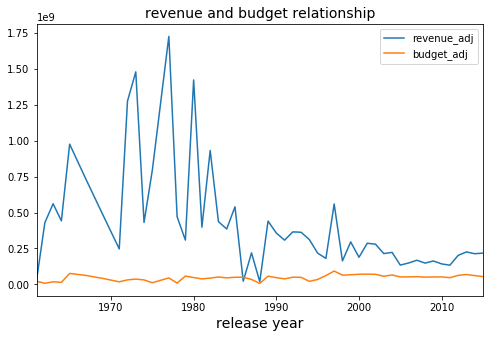

In [38]:
#selecting unique titles then grouping it by the release year, 
#then calculating the mean for each year
plot_budget = df.groupby('original_title').first().groupby('release_year').mean()
plot_budget[['revenue_adj','budget_adj']].plot.line(figsize=(8,5))
plt.title("revenue and budget relationship", fontsize=14);
plt.xlabel("release year", fontsize=14);

### relationship between the budget and revenue across the years
it seems that the revenue doesn't get affected by the budget at least from a scope of the overall industry<br>
and the budget didn't increase that much compared to the start of the industry<br>
but the revenue took a hit compared to the start


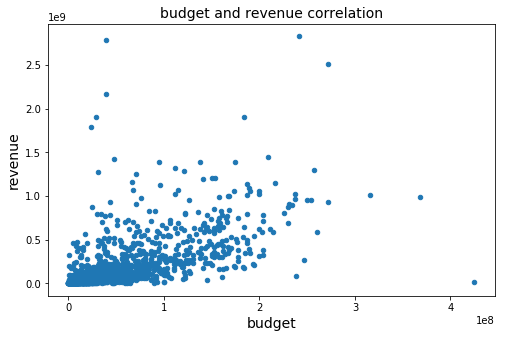

In [40]:
#note use different df don't group it by the year
df.groupby('original_title').first().plot.scatter(y ='revenue_adj', x ='budget_adj', figsize =(8,5))
plt.title("budget and revenue correlation", fontsize=14);
plt.xlabel("budget", fontsize=14)
plt.ylabel("revenue", fontsize=14);

### budget and revenue relationship conclusion
from the data above we can see increasing the budget to a certain point increases the revenue<br>
but it is not the only factor

### lets check for one of the most popular genres Adventure, Action


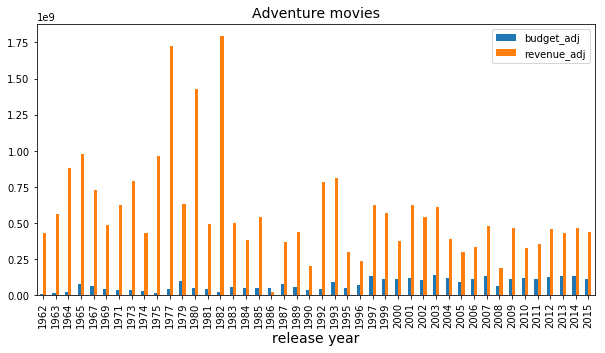

In [41]:
plot_anim = df.query('genres == "Adventure"').groupby('original_title').first().groupby("release_year", group_keys=True).mean()
plot_anim[['budget_adj','revenue_adj']].plot.bar(figsize=(10,5))
plt.title("Adventure movies", fontsize=14);
plt.xlabel("release year",fontsize=14);

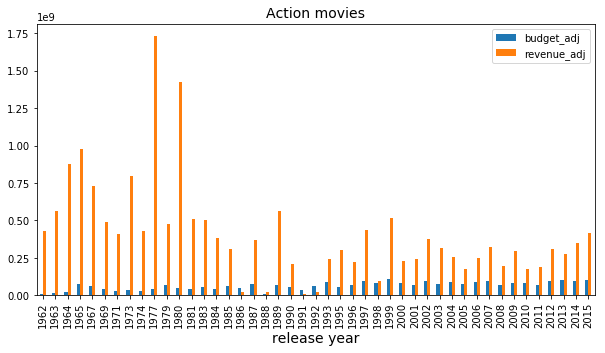

In [43]:
plot_gen = df.query('genres == "Action"').groupby('original_title').first().groupby("release_year", group_keys=True).mean()
plot_gen[["budget_adj",'revenue_adj']].plot.bar(figsize=(10,5))
plt.title("Action movies", fontsize=14);
plt.xlabel("release year",fontsize=14);

### effect of budget on revenue
it seems the correlation between the budget of a movie and revenue is not the deciding factor of a profitable movie<br>
which begs the question what other factor that affect the revenue?<br>
let's check release month 

In [44]:
#creating a month column
df['month'] = df['release_date'].dt.month
df.head(3)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
2,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [45]:
#dataframe reference to unique movie title because i don't need any exploded columns here
df_month = df.groupby('original_title').first()
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, (500) Days of Summer to ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ
Data columns (total 16 columns):
popularity              1280 non-null float64
budget                  1280 non-null int64
revenue                 1280 non-null int64
cast                    1280 non-null object
director                1280 non-null object
overview                1280 non-null object
runtime                 1280 non-null int64
genres                  1280 non-null object
production_companies    1280 non-null object
release_date            1280 non-null datetime64[ns]
vote_count              1280 non-null int64
vote_average            1280 non-null float64
release_year            1280 non-null int64
budget_adj              1280 non-null float64
revenue_adj             1280 non-null float64
month                   1280 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 170.0+ KB


In [46]:
#group revenue by month
plot_month = df_month.groupby('month').mean()[['revenue_adj']]

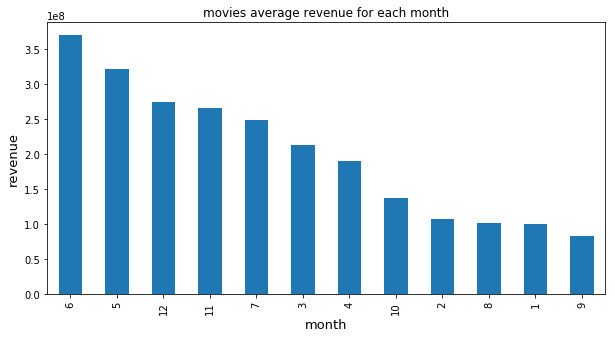

In [48]:
#plot and sorting revenue in Descending order
plot_month.sort_values(ascending = False, by='revenue_adj').plot.bar(figsize=(10,5), legend= False);
plt.ylabel("revenue", fontsize=13)
plt.xlabel("month", fontsize=13);
plt.title("movies average revenue for each month");

### most important months
june and may seems to have the highest sales <br>
while november and december falls behind<br>
it would be a great startegy to release the most anticipated movies at the start of may, june and december


### number of movies released each month

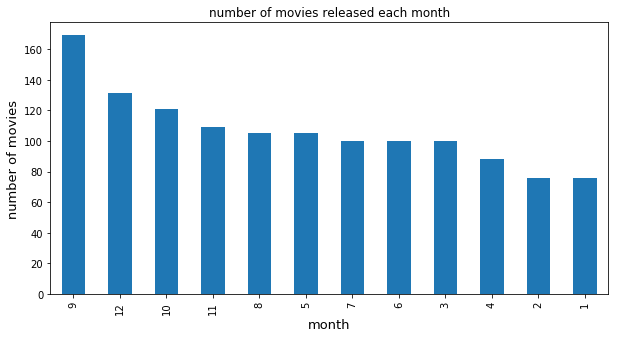

In [49]:
month_count_plt = df.groupby('original_title').first().groupby('month').size()
month_count_plt.sort_values(ascending=False).plot.bar(figsize=(10,5));
plt.ylabel("number of movies", fontsize=13)
plt.xlabel("month", fontsize=13)
plt.title("number of movies released each month");

### number of movies released each month
most of the movies were release in september while december falls behind.<br>
we can conclude from the above two diagrams that there is an untapped market in the month of june

### relationship between revenue and average vote

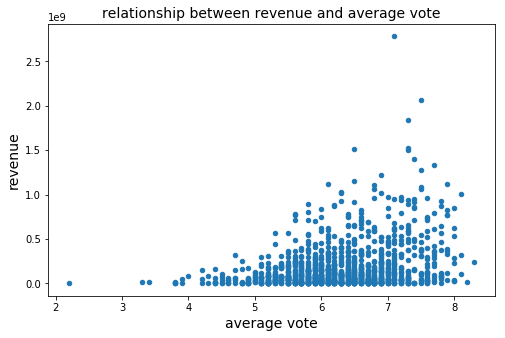

In [51]:
df.groupby('original_title').first()[['vote_average','revenue']].plot.scatter(x= 'vote_average', y = 'revenue',figsize=(8,5));
plt.title("relationship between revenue and average vote", fontsize=14)
plt.xlabel("average vote",fontsize= 14)
plt.ylabel("revenue",fontsize= 14);

Text(0.5,0,'average vote')

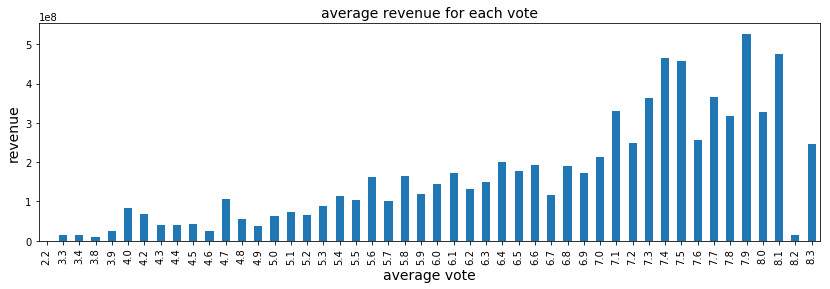

In [52]:
df.groupby('original_title').first().groupby('vote_average').mean()['revenue'].plot.bar(figsize=(14,4));
plt.title("average revenue for each vote", fontsize= 14)
plt.ylabel('revenue', fontsize= 14)
plt.xlabel('average vote', fontsize= 14)

<a id='conclusions'></a>
## Conclusions


#### What are the most popular genres in terms of revenue?
we can conclude that the most revenue generating genre on average is adventure and action movies<br>
while horror and mystery do badly on average<br>

#### What kinds of properties are associated with movies that have high revenues?
movies that have high revenues generally have an average budget to a high budget while being released on the summer season (May,June) and christmas season (November, December) and has at least average vote of 7 and above<br>





### Limitations
<ul>
    <li>I had planned to use popularity column but the data were not that reliable, the number of votes were really low for most of the movies and most movies have a popularity between 2 and zero while the outlier were really far away with higher vote count which mean the outliers are more accurate representation for said movies</li>
    <li>I would like to have data detailing how many people entered the movie in the theater each day and maybe we could see if the movie had a really good idea and marketing campaign if it had really good start of and a bad perception at the end</li>
    <li>markting budget, vfx budget and actors and other budget so i could tell how we could distribute the budget to make good movies </li>
</ul>

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0